# CLASSIFICATION


Dataset source: https://www.openml.org/d/57

## Importing Dataset

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('dataset_57_hypothyroid.csv')

## Viewing Data

In [2]:
data.shape

(3772, 30)

Missing values are marked as '?'

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3772 non-null object
sex                          3772 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3772 non-null 

## Dataset Summary:
- Features: 29
     - Categorical columns: 21
     - Ordinal columns: 2
- Rows: 3772
- Percentage of missing values: 5.3%
- Target Value: 'Class'

# Replacing '?' missing values with NaN

In [4]:
data = data.replace('?', np.nan)

In [5]:
data.isna().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

# Transformation of data 

One Hot encoding

In [6]:
data_onehot = pd.get_dummies(data, columns = ['referral_source'], prefix = ['ref_sr'])

Replacing Ordinal Values

In [7]:
data_onehot['Class'].replace(['negative','compensated_hypothyroid','primary_hypothyroid','secondary_hypothyroid'], [0,1,2,3], inplace=True)

Mapping Nominal Values

In [8]:
data_onehot['sex'].replace(['M', 'F'], [0,1], inplace=True)
data_onehot['on_thyroxine'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['query_on_thyroxine'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['on_antithyroid_medication'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['sick'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['pregnant'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['thyroid_surgery'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['I131_treatment'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['query_hypothyroid'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['query_hyperthyroid'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['lithium'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['goitre'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['tumor'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['hypopituitary'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['psych'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['TSH_measured'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['T3_measured'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['TT4_measured'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['T4U_measured'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['FTI_measured'].replace(['f', 't'], [0,1], inplace=True)
data_onehot['TBG_measured'].replace(['f', 't'], [0,1], inplace=True)

In [9]:
data_onehot = data_onehot.dropna(subset=['sex'])
data_onehot['sex'] = data_onehot['sex'].astype(int)

In [10]:
data_onehot.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FTI_measured,FTI,TBG_measured,TBG,Class,ref_sr_STMW,ref_sr_SVHC,ref_sr_SVHD,ref_sr_SVI,ref_sr_other
0,41,1,0,0,0,0,0,0,0,0,...,1,109,0,NaN,0,0,1,0,0,0
1,23,1,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,0,0,0,0,1
2,46,0,0,0,0,0,0,0,0,0,...,1,120,0,NaN,0,0,0,0,0,1
3,70,1,1,0,0,0,0,0,0,0,...,0,NaN,0,NaN,0,0,0,0,0,1
4,70,1,0,0,0,0,0,0,0,0,...,1,70,0,NaN,0,0,0,0,1,0


# Dealing with missing values

In [11]:
data_onehot = data_onehot.drop(['TBG'], axis=1)

In [12]:
data_onehot.isna().sum()

age                            1
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          352
T3_measured                    0
T3                           745
TT4_measured                   0
TT4                          217
T4U_measured                   0
T4U                          367
FTI_measured                   0
FTI                          365
TBG_measured                   0
Class                          0
ref_sr_STMW                    0
ref_sr_SVHC                    0
ref_sr_SVH

In [13]:
data_onehot['age'] = data_onehot['age'].astype(float)
data_onehot['TSH'] = data_onehot['TSH'].astype(float)
data_onehot['T3'] = data_onehot['T3'].astype(float)
data_onehot['TT4'] = data_onehot['TT4'].astype(float)
data_onehot['T4U'] = data_onehot['T4U'].astype(float)
data_onehot['FTI'] = data_onehot['FTI'].astype(float)

In [14]:
data_onehot.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U,FTI_measured,FTI,TBG_measured,Class,ref_sr_STMW,ref_sr_SVHC,ref_sr_SVHD,ref_sr_SVI,ref_sr_other
0,41.0,1,0,0,0,0,0,0,0,0,...,1.14,1,109.0,0,0,0,1,0,0,0
1,23.0,1,0,0,0,0,0,0,0,0,...,NaN,0,NaN,0,0,0,0,0,0,1
2,46.0,0,0,0,0,0,0,0,0,0,...,0.91,1,120.0,0,0,0,0,0,0,1
3,70.0,1,1,0,0,0,0,0,0,0,...,NaN,0,NaN,0,0,0,0,0,0,1
4,70.0,1,0,0,0,0,0,0,0,0,...,0.87,1,70.0,0,0,0,0,0,1,0


Replacing Nulls with Mode

In [15]:
data_onehot.fillna(data_onehot.mode().iloc[0], inplace=True)

In [16]:
data_onehot.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
Class                        0
ref_sr_STMW                  0
ref_sr_SVHC                  0
ref_sr_SVHD                  0
ref_sr_SVI                   0
ref_sr_o

In [17]:
data_onehot.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U,FTI_measured,FTI,TBG_measured,Class,ref_sr_STMW,ref_sr_SVHC,ref_sr_SVHD,ref_sr_SVI,ref_sr_other
0,41.0,1,0,0,0,0,0,0,0,0,...,1.14,1,109.0,0,0,0,1,0,0,0
1,23.0,1,0,0,0,0,0,0,0,0,...,0.99,0,100.0,0,0,0,0,0,0,1
2,46.0,0,0,0,0,0,0,0,0,0,...,0.91,1,120.0,0,0,0,0,0,0,1
3,70.0,1,1,0,0,0,0,0,0,0,...,0.99,0,100.0,0,0,0,0,0,0,1
4,70.0,1,0,0,0,0,0,0,0,0,...,0.87,1,70.0,0,0,0,0,0,1,0


Histogram of Dataset

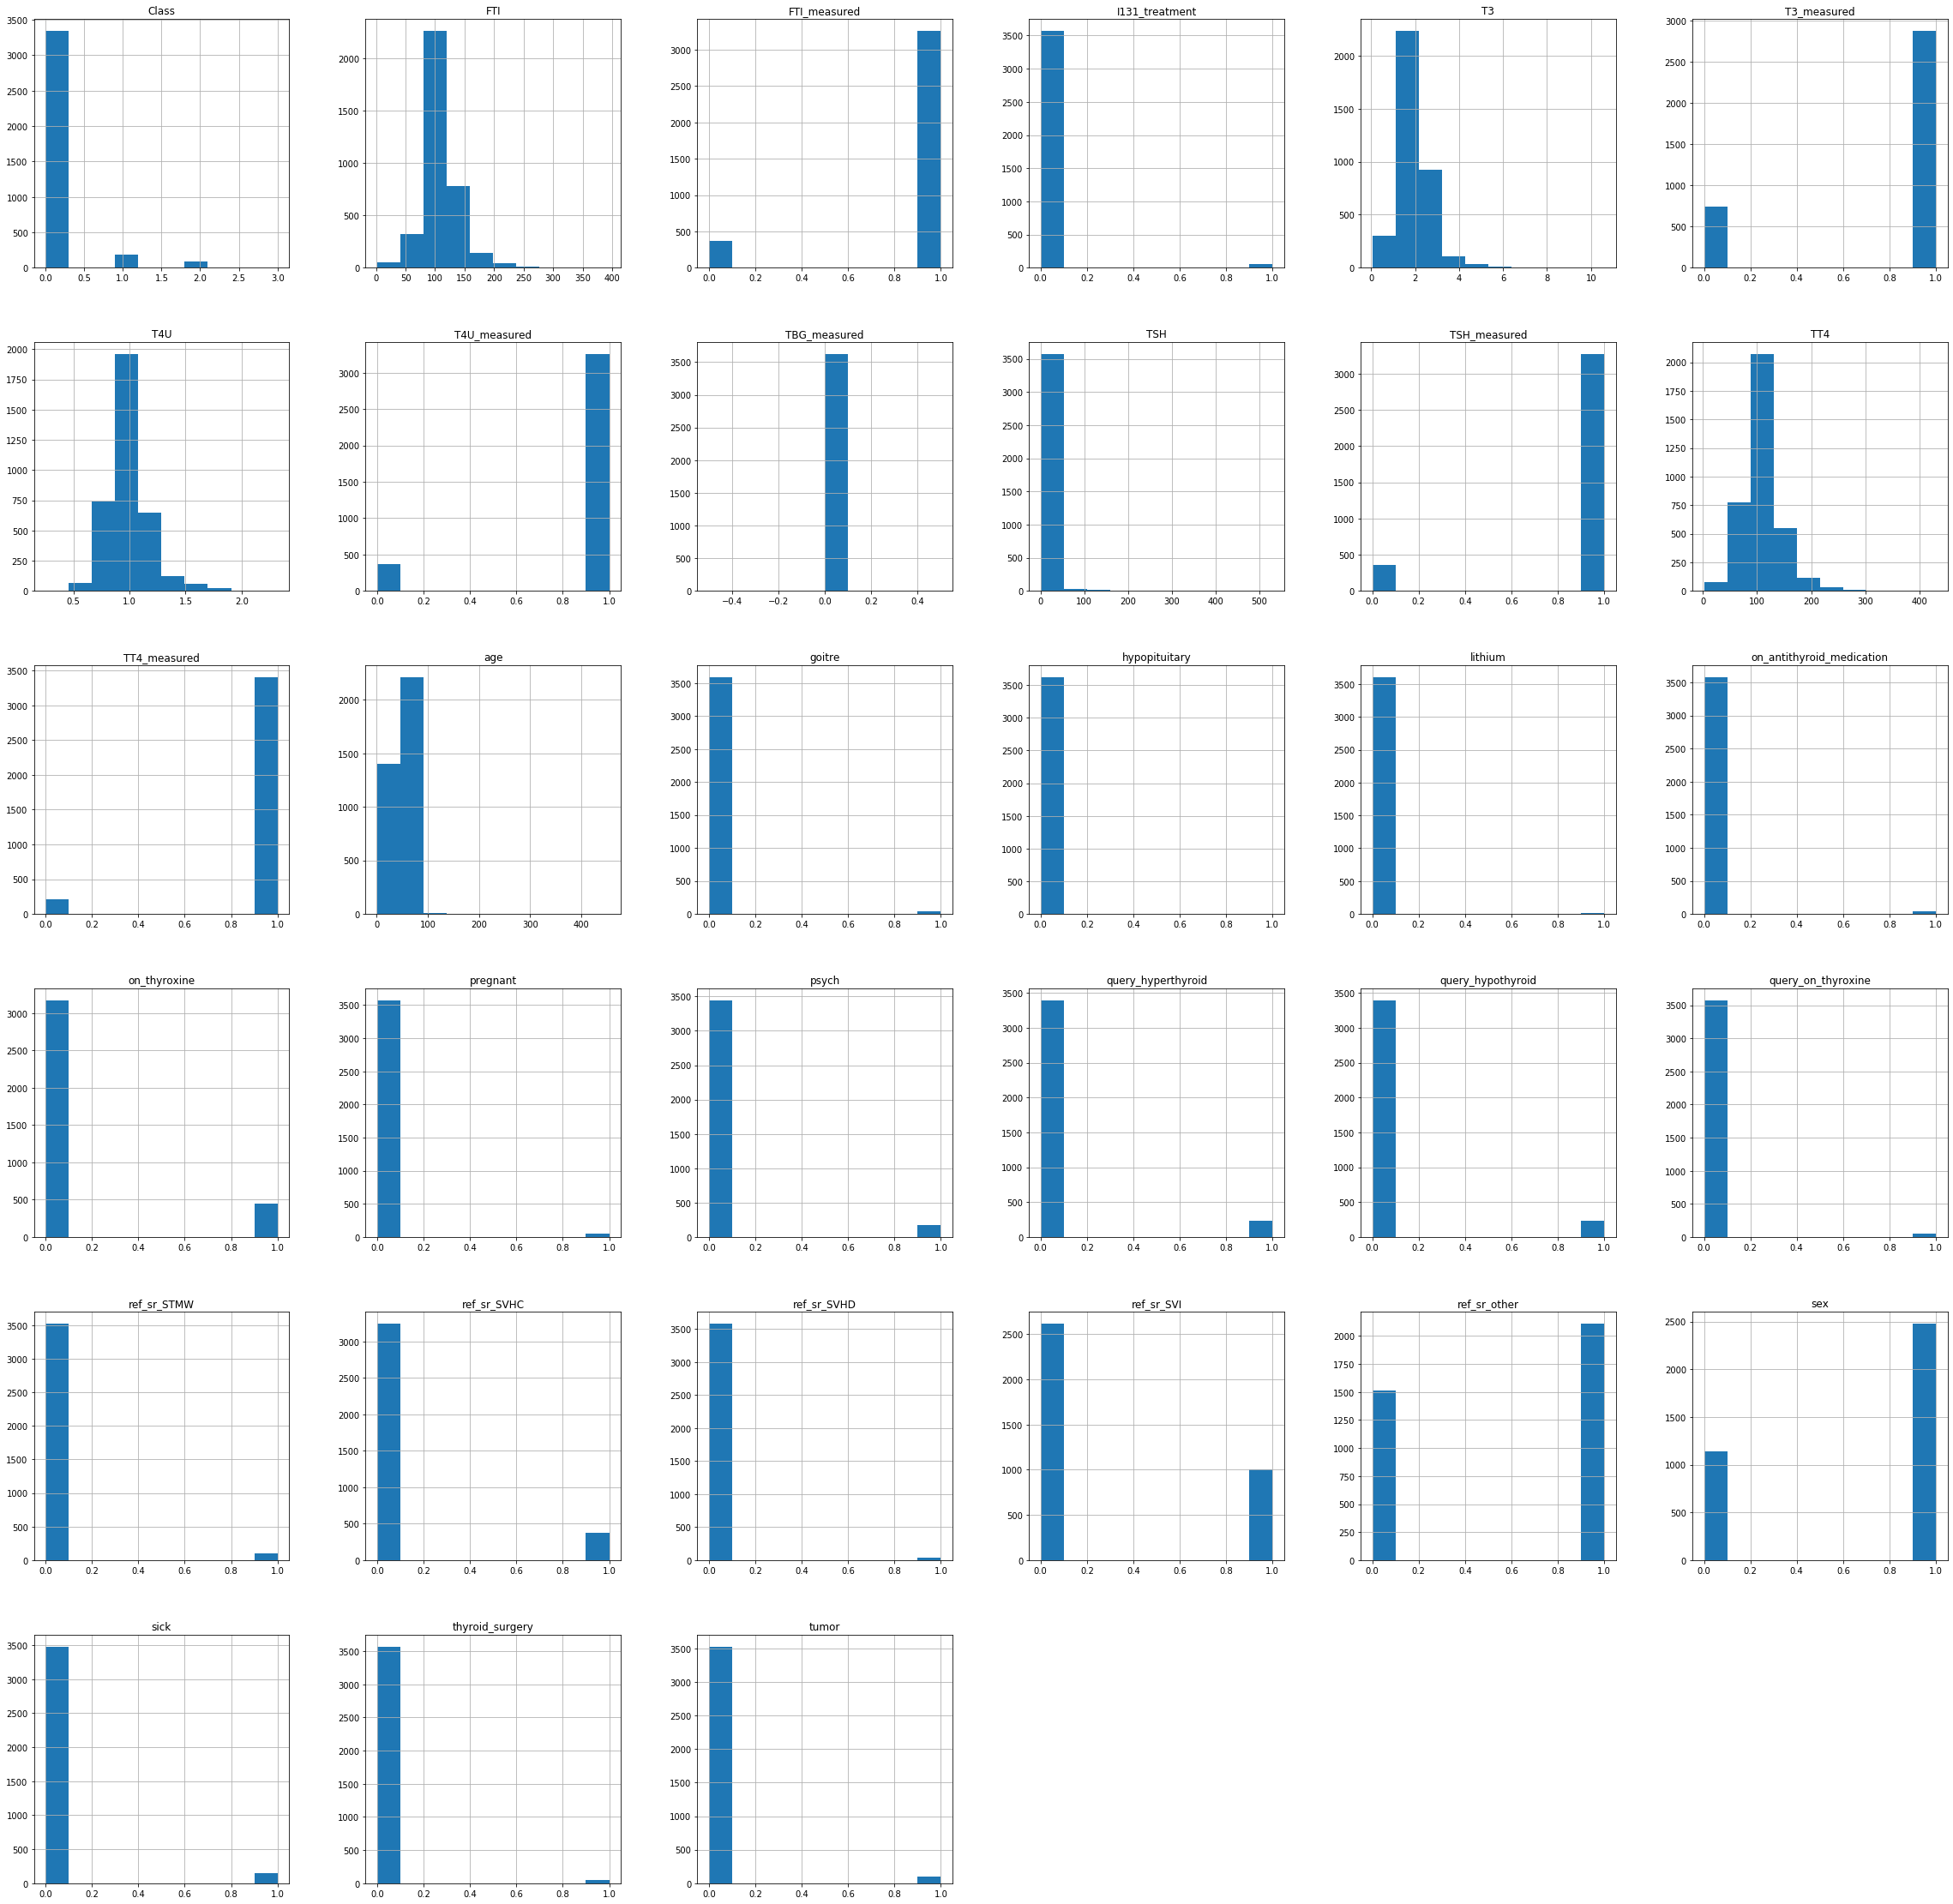

In [26]:
pd.DataFrame.hist(data_onehot, figsize = [40,40]);

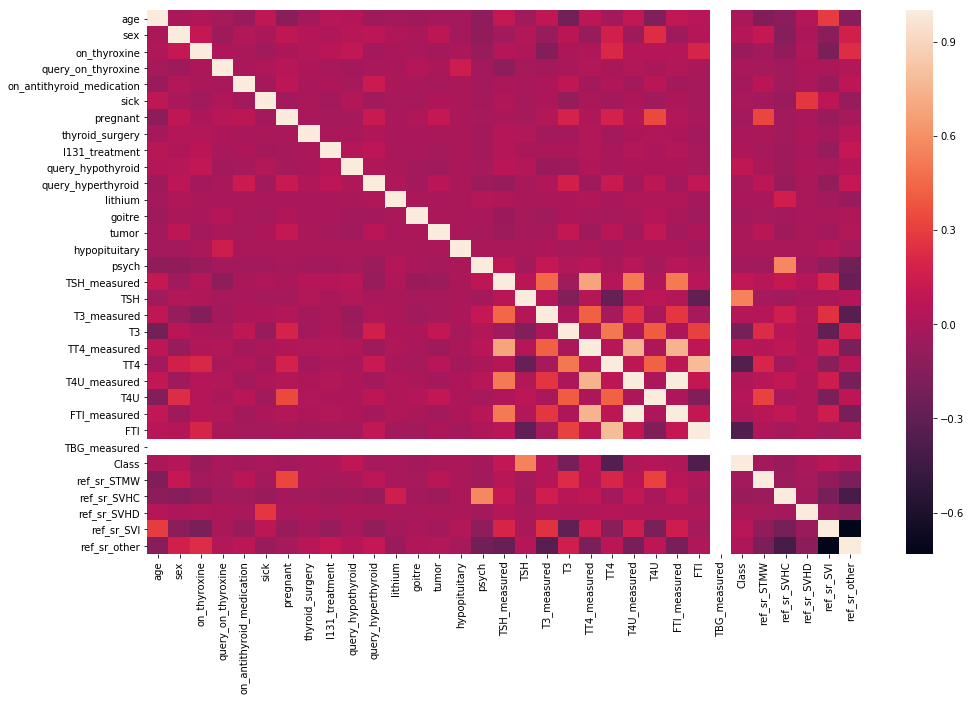

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (16,10))
corr = data_onehot.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


Importing required libraries

In [20]:
from statistics import mean
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions

# Splitting the data

In [21]:
y = data_onehot['Class']
X = data_onehot.drop(['Class'], axis = 1)

In [22]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Voting Classifier

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [24]:
log_clf = LogisticRegression()
svc_clf = SVC(kernel = 'rbf', gamma = 0.01, probability=True)
dt_clf = DecisionTreeClassifier(max_depth= 5)
log_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
print('LogisticRegression ', log_clf.score(X_train, y_train))
print('SVC ', svc_clf.score(X_train, y_train))
print('DecisionTree ', dt_clf.score(X_train, y_train))

LogisticRegression  0.9344624447717231
SVC  0.9234167893961709
DecisionTree  0.9974226804123711


## Hard Voting

In [26]:
hard_voting = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf), ('dt', dt_clf)], voting = 'hard')
hard_voting.fit(X_train, y_train)
print('Hard Voting ', hard_voting.score(X_train, y_train))

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Hard Voting  0.9348306332842415


## Soft voting

In [27]:
soft_voting = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf), ('dt', dt_clf)], voting = 'soft')
soft_voting.fit(X_train, y_train)
print('Soft Voting ', soft_voting.score(X_train, y_train))

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Soft Voting  0.977540500736377


# Bagging

## Decision Tree

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 0, max_depth= 1)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, bootstrap= True, max_features=10, random_state = 0)

In [29]:
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.9205298013245033

In [30]:
bag_clf.score(X_train, y_train)

0.9234167893961709

In [31]:
X_train.shape

(2716, 32)

## K Neighbors Classifier

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
bag_clf = BaggingClassifier(knn_clf, n_estimators=500, bootstrap= True, max_features=10, random_state = 0)

In [33]:
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.9249448123620309

In [34]:
bag_clf.score(X_train, y_train)

0.9407216494845361

In [35]:
X_train.shape

(2716, 32)

# Pasting

## Decision Tree

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 0, max_depth= 1)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, bootstrap= False, max_features=10, random_state = 0)

In [37]:
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.9205298013245033

In [38]:
bag_clf.score(X_train, y_train)

0.9234167893961709

In [39]:
X_train.shape

(2716, 32)

## K Neighbors Classifier

In [40]:
from sklearn.ensemble import BaggingClassifier

knn_clf =KNeighborsClassifier()
bag_clf = BaggingClassifier(knn_clf, n_estimators=500, bootstrap= True, max_features=10, random_state = 0)

In [41]:
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.9249448123620309

In [42]:
bag_clf.score(X_train, y_train)

0.9407216494845361

In [43]:
X_train.shape

(2716, 32)

# AdaBoost

## Decision Tree

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state = 0, max_depth= 1), n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [45]:
ada_clf.score(X_train, y_train)

0.9871134020618557

In [46]:
ada_clf.score(X_test, y_test)

0.977924944812362

## Logistic Regression

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

ada_clf = AdaBoostClassifier(LogisticRegression(), n_estimators=200, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\a

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\a

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\a

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [48]:
ada_clf.score(X_train, y_train)

0.9285714285714286

In [49]:
ada_clf.score(X_test, y_test)

0.9205298013245033

# Gradient Boost

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gd_clf = GradientBoostingClassifier(max_depth= 1, n_estimators= 50, learning_rate= 0.1, random_state= 0)

In [51]:
gd_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [52]:
gd_clf.score(X_train, y_train)

0.9937407952871871

In [53]:
gd_clf.score(X_test, y_test)

0.9933774834437086

# PCA

In [54]:
X.shape

(3622, 32)

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)

In [56]:
X_train_reduced.shape

(2716, 17)

In [57]:
X_test_reduced = pca.transform(X_test)

# Evaluation Strategy

We are interested to predict if a patient has hypothyroidism. Hence we fail if we wrongly classify someones as a false negative. Using a confusion matrix will be the best strategy here. 
Aim here will be to reduce False Negatives. So we have to increase Recall.

# KNN classification

In [58]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_reduced, y_train)
    train_score_array.append(knn.score(X_train_reduced, y_train))
    test_score_array.append(knn.score(X_test_reduced, y_test))

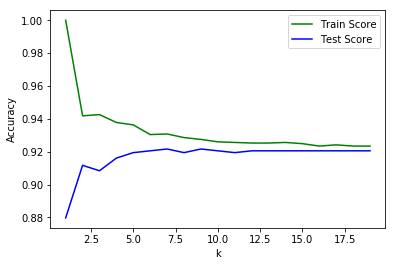

In [59]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [60]:
knn = KNeighborsClassifier(5)
knn.fit(X_train_reduced, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_reduced, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test_reduced, y_test)))
pred_knn = knn.predict(X_test_reduced)

confusion = confusion_matrix(y_test, pred_knn)
print("\nConfusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_knn))

Train score: 0.9363
Train score: 0.9194

Confusion matrix:
[[829   5   0   0]
 [ 50   2   0   0]
 [ 16   1   2   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       834
           1       0.25      0.04      0.07        52
           2       1.00      0.11      0.19        19
           3       0.00      0.00      0.00         1

   micro avg       0.92      0.92      0.92       906
   macro avg       0.54      0.28      0.30       906
weighted avg       0.89      0.92      0.89       906



C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression

In [61]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(multi_class= 'auto', solver = 'liblinear', penalty = 'l1', C = c, max_iter=1000)
    log_l2 = LogisticRegression(multi_class= 'auto', solver = 'lbfgs', penalty = 'l2', C = c, max_iter=4000)
    log_l1.fit(X_train_reduced, y_train)
    log_l2.fit(X_train_reduced, y_train)
    train_score_l1.append(log_l1.score(X_train_reduced, y_train))
    train_score_l2.append(log_l2.score(X_train_reduced, y_train))
    test_score_l1.append(log_l1.score(X_test_reduced, y_test))
    test_score_l2.append(log_l2.score(X_test_reduced, y_test))

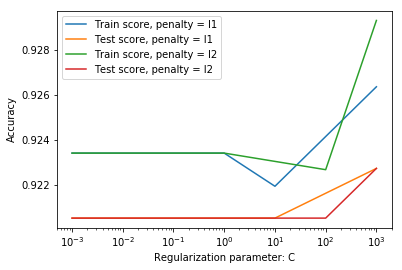

In [62]:
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

penality=l2 and c=10 are the best parameters

In [63]:
logreg = LogisticRegression(penalty='l2',C=10,random_state=0)
logreg.fit(X_train_reduced,y_train)

print("Train scores: {}".format(logreg.score(X_train_reduced, y_train)))
print("Test scores: {}".format(logreg.score(X_test_reduced, y_test)))


pred_lreg = logreg.predict(X_test_reduced)

confusion = confusion_matrix(y_test, pred_lreg)
print("\nConfusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_lreg))

Train scores: 0.9234167893961709
Test scores: 0.9205298013245033

Confusion matrix:
[[834   0   0   0]
 [ 52   0   0   0]
 [ 19   0   0   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       834
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         1

   micro avg       0.92      0.92      0.92       906
   macro avg       0.23      0.25      0.24       906
weighted avg       0.85      0.92      0.88       906



C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'p

# Linear Support Vector Machine Classifier

In [64]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train_reduced,y_train)

print("Train scores: {}".format(clf.score(X_train_reduced, y_train)))
print("Test scores: {}".format(clf.score(X_test_reduced, y_test)))



Train scores: 0.9234167893961709
Test scores: 0.9205298013245033


C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'On Thyroxine')

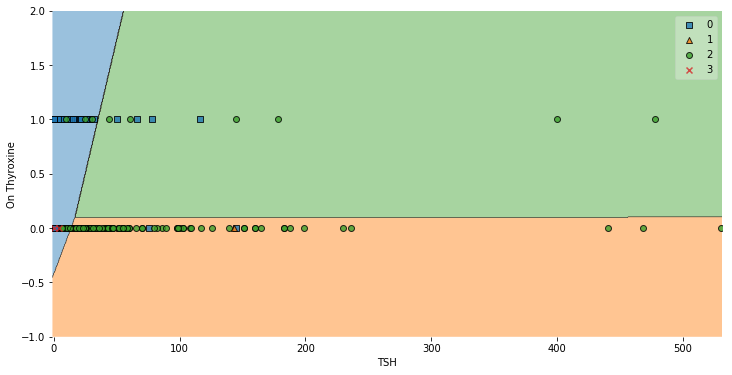

In [65]:
X1 = data_onehot[['TSH','on_thyroxine']].to_numpy()
y1 = data_onehot['Class'].to_numpy()

clf = LinearSVC()
clf.fit(X1,y1)

%matplotlib inline
fig ,ax= plt.subplots(figsize = (12,6))
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X1, y1, clf)
plt.xlabel("TSH")
plt.ylabel("On Thyroxine")

In [66]:
clf = LinearSVC()
clf.fit(X_train_reduced,y_train)

pred_lsvc = clf.predict(X_test_reduced)

confusion = confusion_matrix(y_test, pred_lsvc)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_lsvc))

Confusion matrix:
[[834   0   0   0]
 [ 52   0   0   0]
 [ 19   0   0   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       834
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         1

   micro avg       0.92      0.92      0.92       906
   macro avg       0.23      0.25      0.24       906
weighted avg       0.85      0.92      0.88       906



C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Kernelized Support Vector Machine

In [67]:
from sklearn.svm import SVC

c_range = [0.001,0.01,0.1,1,10,100]
g_range = [0.001,0.01,0.1,1,10,100]

train_score_list = []
test_score_list = []
index=[]

for x in c_range:
    for g in g_range:
        index.append((x,g))
        svc_rbf = SVC(kernel='rbf', gamma=g,C=x)
        svc_rbf.fit(X_train_reduced,y_train)
        train_score_list.append(svc_rbf.score(X_train_reduced,y_train))
        test_score_list.append(svc_rbf.score(X_test_reduced, y_test))

Text(0.5, 0, 'C and Gamma')

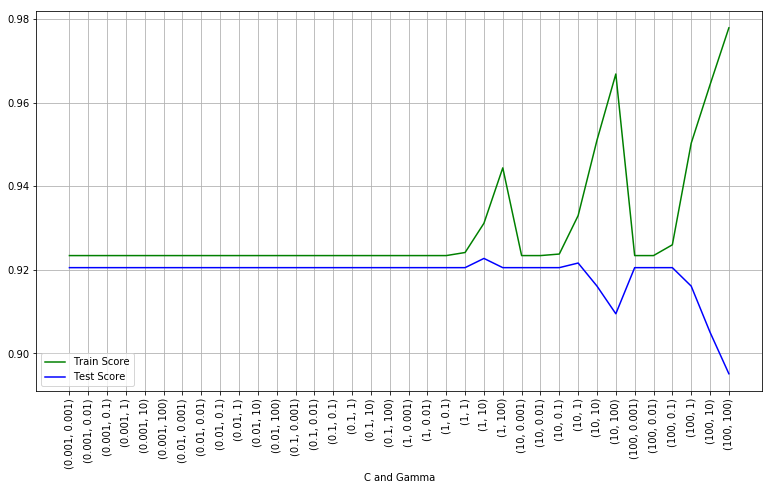

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel('C and Gamma')

gamma = 0.01 and c = 10 are the best parameters

In [69]:
svc_rbf = SVC(kernel='rbf', gamma=0.01,C=10)
svc_rbf.fit(X_train_reduced,y_train)

print("Train scores: {}".format(svc_rbf.score(X_train_reduced, y_train)))
print("Test scores: {}".format(svc_rbf.score(X_test_reduced, y_test)))

pred_svcrbf = svc_rbf.predict(X_test_reduced)

confusion = confusion_matrix(y_test, pred_svcrbf)
print("Confusion matrix:\n{}".format(confusion))

print(classification_report(y_test, pred_svcrbf))

Train scores: 0.9234167893961709
Test scores: 0.9205298013245033
Confusion matrix:
[[834   0   0   0]
 [ 52   0   0   0]
 [ 19   0   0   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       834
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         1

   micro avg       0.92      0.92      0.92       906
   macro avg       0.23      0.25      0.24       906
weighted avg       0.85      0.92      0.88       906



C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVC with Poly Kernel

In [70]:
deg_range = [1,2,3,4,5,6,7]
c_range = [0.001,0.01,0.1,1,10,100]


train_score_list = []
test_score_list = []
index=[]

for x in deg_range:
    for c in c_range:
        index.append((x,c))
        svc_poly = SVC(kernel='poly', degree=x, C=c)
        svc_poly.fit(X_train_reduced,y_train)
        train_score_list.append(svc_poly.score(X_train_reduced,y_train))
        test_score_list.append(svc_poly.score(X_test_reduced, y_test))

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

Text(0.5, 0, 'Degree and C')

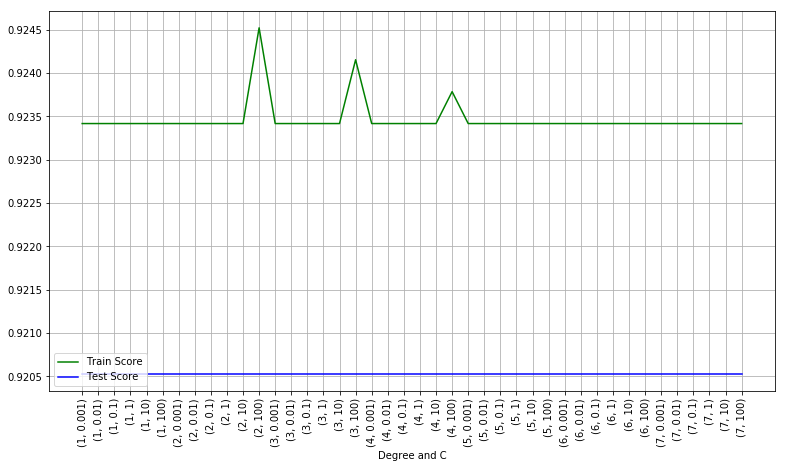

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel('Degree and C')

Degree = 2 and C = 10 seems to be the best performing parameter

In [72]:
svc_poly = SVC(kernel='poly', degree=2, C=10)
svc_poly.fit(X_train_reduced,y_train)

print("Train scores: {}".format(svc_poly.score(X_train_reduced, y_train)))
print("Test scores: {}".format(svc_poly.score(X_test_reduced, y_test)))

pred_poly = svc_poly.predict(X_test_reduced)

confusion = confusion_matrix(y_test, pred_poly)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_poly))

C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train scores: 0.9234167893961709
Test scores: 0.9205298013245033
Confusion matrix:
[[834   0   0   0]
 [ 52   0   0   0]
 [ 19   0   0   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       834
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         1

   micro avg       0.92      0.92      0.92       906
   macro avg       0.23      0.25      0.24       906
weighted avg       0.85      0.92      0.88       906



C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
c_range = [0.001,0.01,0.1,1,10,100]

train_score_list = []
test_score_list = []

for x in c_range:
    svc_lin = SVC(kernel='linear', C=x)
    svc_lin.fit(X_train_reduced,y_train)
    train_score_list.append(svc_lin.score(X_train_reduced,y_train))
    test_score_list.append(svc_lin.score(X_test_reduced, y_test))

print(train_score_list)
print(test_score_list)

[0.9234167893961709, 0.9234167893961709, 0.9234167893961709, 0.9234167893961709, 0.9234167893961709, 0.9237849779086893]
[0.9205298013245033, 0.9205298013245033, 0.9205298013245033, 0.9205298013245033, 0.9205298013245033, 0.9205298013245033]


Text(0.5, 0, 'C')

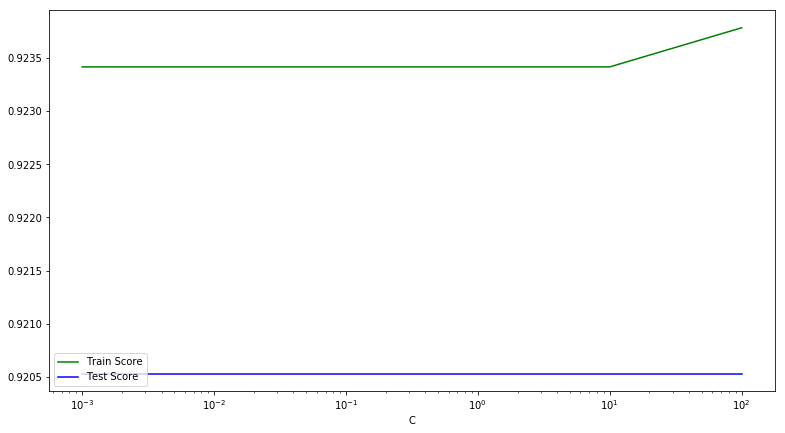

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

C = 10 seems to be the best parameter

In [75]:
svc_lin = SVC(kernel='linear', C=10)
svc_lin.fit(X_train_reduced,y_train)

print("Train scores: {}".format(svc_lin.score(X_train_reduced, y_train)))
print("Test scores: {}".format(svc_lin.score(X_test_reduced, y_test)))

pred_lin = svc_lin.predict(X_test_reduced)

confusion = confusion_matrix(y_test, pred_lin)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_lin))

Train scores: 0.9234167893961709
Test scores: 0.9205298013245033
Confusion matrix:
[[834   0   0   0]
 [ 52   0   0   0]
 [ 19   0   0   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       834
           1       0.00      0.00      0.00        52
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         1

   micro avg       0.92      0.92      0.92       906
   macro avg       0.23      0.25      0.24       906
weighted avg       0.85      0.92      0.88       906



C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train_reduced, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


In [77]:
max_range = [1,2,3,4,5]

train_score_list = []
test_score_list = []

for m in max_range:
    dtree = DecisionTreeClassifier(max_depth=m, random_state=0)
    dtree.fit(X_train_org, y_train)
    train_score_list.append(dtree.score(X_train_org,y_train))
    test_score_list.append(dtree.score(X_test_org, y_test))

In [78]:
print(train_score_list)
print(test_score_list)

[0.9528718703976435, 0.977540500736377, 0.9930044182621502, 0.9955817378497791, 0.9974226804123711]
[0.9580573951434879, 0.977924944812362, 0.9911699779249448, 0.9933774834437086, 0.9955849889624724]


Text(0.5, 0, 'Max Depth')

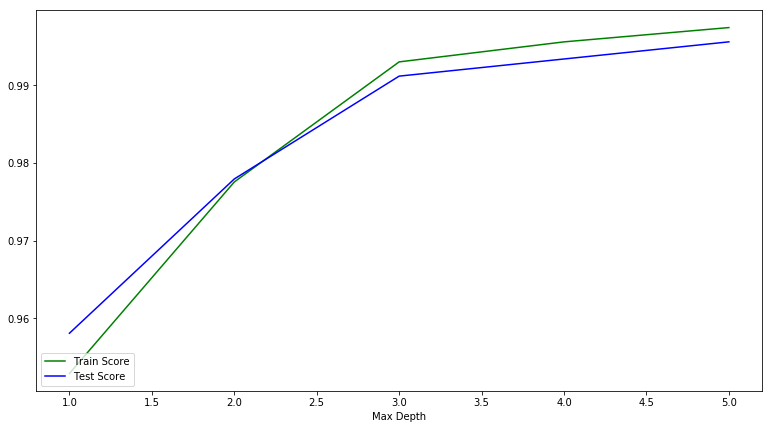

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(max_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(max_range, test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.xlabel('Max Depth')

Max Depth = 5 seems to be the best performing parameter

In [80]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train_org, y_train)

pred_d = dtree.predict(X_test_org)

confusion = confusion_matrix(y_test, pred_d)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, pred_d))

Confusion matrix:
[[829   4   1   0]
 [  0  52   0   0]
 [  1   1  17   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       834
           1       0.91      1.00      0.95        52
           2       0.94      0.89      0.92        19
           3       0.00      0.00      0.00         1

   micro avg       0.99      0.99      0.99       906
   macro avg       0.71      0.72      0.72       906
weighted avg       0.99      0.99      0.99       906



C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


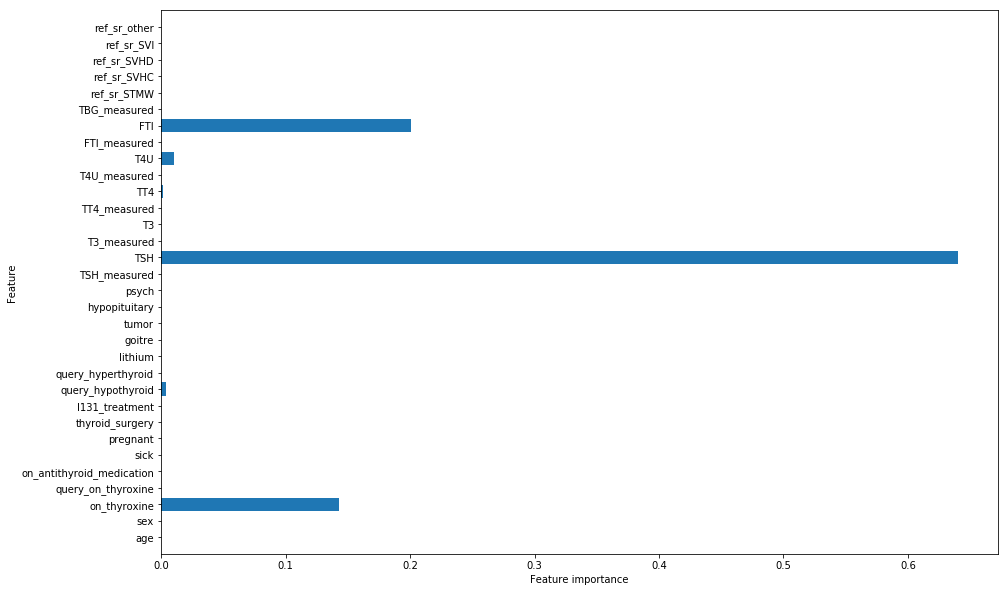

In [81]:
%matplotlib inline
def plot_feature_importances(model):
    fig ,ax= plt.subplots(figsize = (15,10))
    n_features = X_train_org.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_org.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(dtree)

TSH is the most important feature

# Comparision of Models Before and After PCA

## Before PCA

In [82]:
import pandas as pd
Classification = {'Models before PCA':['KNN classification','Logistic Regrerssion','Linear SVM','SVC - kernel','SVC - poly','Decision Tree'],'Train Score':[0.9404,0.9422,0.9411,0.9264,0.9669,0.9974],'Test_Score':[0.9205,0.9327,0.9326,0.9227,0.9603,0.9956]}
Classification_score = pd.DataFrame(Classification)
Classification_score

,Models before PCA,Train Score,Test_Score
0,KNN classification,0.9404,0.9205
1,Logistic Regrerssion,0.9422,0.9327
2,Linear SVM,0.9411,0.9326
3,SVC - kernel,0.9264,0.9227
4,SVC - poly,0.9669,0.9603
5,Decision Tree,0.9974,0.9956


From the above information we conclude Decision Tree with max depth 5 is our best classification model

## After PCA

In [83]:
Classification = {'Models after PCA':['KNN classification','Logistic Regrerssion','Linear SVM','SVC - kernel','SVC - poly','Decision Tree'],'Train Score':[0.9363,0.9234,0.9234,0.9234,0.9237,0.9974],'Test_Score':[0.9194,0.9205,0.9205,0.9205,0.9205,0.9956]}
Classification_score = pd.DataFrame(Classification)
Classification_score

,Models after PCA,Train Score,Test_Score
0,KNN classification,0.9363,0.9194
1,Logistic Regrerssion,0.9234,0.9205
2,Linear SVM,0.9234,0.9205
3,SVC - kernel,0.9234,0.9205
4,SVC - poly,0.9237,0.9205
5,Decision Tree,0.9974,0.9956


After PCA Decision Tree is our best classification model

# Deep Learning

In [84]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(0) # for reproducibility

Using TensorFlow backend.


In [85]:
# step 1: build the model
model = Sequential()
#input layer
model.add(Dense(30, input_dim = 32, activation='sigmoid'))
#hidden layer
model.add(Dense(20, activation = 'sigmoid'))
#output layer
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [86]:
# step 2: compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [87]:
# step 3: train the model
model.fit(X_train, y_train, batch_size= 128, epochs=10)

Epoch 1/10
2716/2716 [==============================] - 1s 234us/sample - loss: 1.4823 - acc: 0.7747
Epoch 2/10
2716/2716 [==============================] - 0s 26us/sample - loss: 0.9810 - acc: 0.9234
Epoch 3/10
2716/2716 [==============================] - 0s 26us/sample - loss: 0.6876 - acc: 0.9234
Epoch 4/10
2716/2716 [==============================] - 0s 28us/sample - loss: 0.5417 - acc: 0.9234
Epoch 5/10
2716/2716 [==============================] - 0s 26us/sample - loss: 0.4697 - acc: 0.9234
Epoch 6/10
2716/2716 [==============================] - 0s 27us/sample - loss: 0.4306 - acc: 0.9234
Epoch 7/10
2716/2716 [==============================] - 0s 28us/sample - loss: 0.4065 - acc: 0.9234
Epoch 8/10
2716/2716 [==============================] - 0s 26us/sample - loss: 0.3902 - acc: 0.9234
Epoch 9/10
2716/2716 [==============================] - 0s 26us/sample - loss: 0.3785 - acc: 0.9234
Epoch 10/10
2716/2716 [==============================] - 0s 28us/sample - loss: 0.3697 - acc: 0.923

In [88]:
# Step 4: Model evaluation


loss_and_metrics = model.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

906/906 [==============================] - 0s 257us/sample - loss: 0.3715 - acc: 0.9205
Test Loss 0.3715082864229779
Test Accuracy 0.9205298


In [89]:
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


834  classified correctly
72  classified incorrectly


C:\Users\akhil\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


# Conclusion
Before PCA, the models had high accuracies for both test and train. After dimesionality reduction by PCA, there is some loss of information, which resulted in a reduction of the train and test accuracies. So now we have a more genralized model compared to before as we are not considering the components which are not contributing to that much variance (can be considered as noise).
### Best Performing Model - Decision Tree Classifier
- Train Score: 0.997
- Test Score:  0.995
- Accuracy:    0.99
- Recall:      0.99

# PROJECT BY - Group 7
## Akhilandeshwari Bekkary (axb176530)
## Anantha Shashidhar Karunakaram(axk176830)